# Homework 2: Programming

The following notebook contains skeleton-code for answering problems 2 and 3 of homework assignment 2. Please read through each cell carefully to understand what is expected to be implemented. For your final submission, please try to clean up any intermediate outputs used for debugging.

### Imports

You should be able to complete the entire assignment using only the following imports. Please consult the course staff if you are unsure about whether additional packages may be used.

In [2]:
## Import Packages
import random
import numpy as np
import matplotlib.pyplot as plt

## Question 2


Below we provide an AutoGrad class named `Value`. The basic idea is to store the existing computational map during the creation of each `Value`, and calculate the gradient using backpropagation when one of the `Value` calls `backward()` method.

The `backward()` function will arange the computational graph and backpropagate the gradients. All you need to do is to implement all the operations with its corresponding `_backward` function. We have provided the `__add__` function (sum of two nodes) as an example to help get you started.

This notebook is designed in a Object Oriented way, if you are not farmiliar with the Object Oriented Programming in Python, you can refer to:

(1) https://realpython.com/python3-object-oriented-programming/

(2) https://docs.python.org/3/tutorial/classes.html


In [167]:
class Value:
    
    """
    Basic unit of storing a single scalar value and its gradient
    """
    
    def __init__(self, data, _children=()):
        """
        
        """
        self.data = data
        self.grad = 0
        self._prev = set(_children)
        self._backward = lambda: None
    
    def __add__(self, other):
        """
        Example implementation of a single class operation (addition)
        
        Args:
            other (Any): Node to add with the class
        
        Returns:
            out (callable): Function to referesh the gradient
        """
        #Firstly, convert some default value type in python to Value
        #Then do operations with two or more Value object
        other = other if isinstance(other, Value) else Value(other)

        #Secondly, create a new Value object which is the result of the operation 
        out = Value(self.data + other.data, (self, other))

        #Thirdly, create a _backward function for the output object to refresh
        # the gradient of its _childrens, 
        #Then assign this _backward function to the output object.
        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward

        return out

    def __mul__(self, other):
        """
        Multiplication operation (e.g. Value(3) * Value(2) = Value(6))
        """
        #TODO implement multiplication operation
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data*other.data,(self,other))

        def _backward():
            self.grad += other.data*out.grad
            other.grad += self.data*out.grad
        out._backward = _backward
        
        return out
    
    def __pow__(self, other):
        """
        Power operation (e.g Value(3) ** 2 = Value(9))
        """
        #TODO implement power operation, we don't need to convert the exponent to Value
        assert isinstance(other, (int, float))
        out = Value(self.data**other,(self,))
        
        def _backward():
            self.grad += (other*self.data**(other-1))*out.grad
        out._backward = _backward
        
        return out
    
    def relu(self):
        """
        ReLU activation function applied to the current Value
        """
        #TODO implement the relu activation function for the value itself.
        out = Value(0 if self.data<0 else self.data,(self,))
        
        def _backward():
            self.grad += out.grad*(out.data>0)
        out._backward = _backward

        return out
    
    
    def exp(self):
        """
        Exponentiate the current Value (e.g. e ^ Value(0) = Value(1))
        """
        #TODO implement the exponential function for and treat the value as exponent.
        #The base is natural e, you can use numpy to calculate the value of the exponential.
        out = Value(np.exp(self.data),(self,))
        
        def _backward():
            self.grad += out.grad*out.data
        out._backward = _backward

        return out
    
    def log(self):
        """
        Take the natural logarithm (base e) of the current Value
        """
        #TODO implement the logarithm function for and treat the value as exponent.
        #The bottom number should be e, you can use numpy to calculate the value of the logarithm.
        out = Value(np.log(self.data),(self,))
        
        def _backward():
            #self.grad += out.grad/self.data
            self.grad += 1 / self.data * out.grad
        out._backward = _backward

        return out
    
    def backward(self):
        """
        Run backpropagation from the current Value
        """
        #This function is called when you start backpropagation from this Value

        #The gradient of this value is initialized to 1 for you.
        self.grad = 1

        #You need to find a right topological order all of the children in the graph.
        #As for topology sort, you can refer to http://www.cs.cornell.edu/courses/cs312/2004fa/lectures/lecture15.htm
  
        topo = []
        #TODO find the right list of Value to be traversed
        '''
        Hint: you can recursively visit all non-visited node from the node calling backward.
        add one node to the head of the list after all of its children node are visited
        '''
        visited_s = set()
        def set_topo(v):
            #Use DFS method to fill the topologic set
            if v not in visited_s:
                visited_s.add(v)
                for child in v._prev:
                    set_topo(child)
                topo.append(v)
        set_topo(self)
        #go one variable at a time and apply the chain rule to get its gradient
        
        #reverse the set to get topo order as we expect
        topo = reversed(topo)
        for v in topo:
            v._backward()

    # We handled the negation and reverse operations for you
    def __neg__(self): # -self
        """
        Negate the current Value
        """
        return self * -1

    def __radd__(self, other): #other + self
        """
        Reverse addition operation (ordering matters in Python)
        """
        return self + other
    
    def __sub__(self, other): # self - other
        """
        Subtraction operation
        """
        return self + (-other)
    
    def __rsub__(self, other): # other - self
        """
        Reverse subtraction operation
        """
        return other + (-self)
    
    def __rmul__(self, other): # other * self
        """
        Reverse multiplication operation
        """
        return self * other
    
    def __truediv__(self, other): # self / other
        """
        Division operation
        """
        return self * other**-1
    
    def __rtruediv__(self, other): # other / self
        """
        Reverse diction operation
        """
        return other * self**-1
    
    def __repr__(self):
        """
        Class representation (instead of unfriendly memory address)
        """
        return f"Value(data={self.data}, grad={self.grad})"

Now, we are going to use the simple example in q1.b to get you familar with the usage of this class.

If your implementation is correct, you will get the same values and gradients as your hand-caculated ones.

Be careful! Even you get this test case right, it does not guarantee the correctness of your implementation. 

In [10]:
## Initialize Example Values (From Written Assignment)
w1 = Value(0.3)
w2 = Value(-0.5)
x1 = Value(0.2)
x2 = Value(0.4)

#TODO
#Do calculation for the question 1.b, and call backward to start backpropagation.
#Then print out the gradient of w1 w2 x1 x2.
def f(w1,w2,x1,x2): return 1/(1+np.exp(-(w1*x1+w2*x2)))+0.5*(w1**2+w2**2)
f(w1,w2,x1,x2).backward()
print(w1.grad)
print(w2.grad)
print(x1.grad)
print(x2.grad)

0.34975579811673396
-0.400488403766532
0.074633697175101
-0.124389495291835


## Question 3

### Implementation of the linear layer
You will implement a `LinearLayer` module here.

We provide the initialization of the class `LinearLayer`. You need to implement the forward function -- Return the results - `out` with the shape `[n_samples, n_out_channels]` of a linear layer when the the data `x` shaped `[n_samples, n_in_channels]` is fed into it.
 

In [11]:
class Module:
    
    """
    Base Model Module
    """
    
    def parameters(self):
        """
        
        """
        return []

    def zero_grad(self):
        """
        
        """
        for p in self.parameters():
            p.grad = 0

class LinearLayer(Module):
    
    """
    Linear Layer
    """
    
    def __init__(self, nin, nout):
        """
        Here we randomly initilize the weights w as 2-dimensional list of Values
        And b as 1-dimensional list of Values with value 0
        
        You may use this stucture to implement the __call__ function
        """
        self.w = []
        for i in range(nin):
            w_tmp = [Value(random.uniform(-1,1)) for j in range(nout)]
            self.w.append(w_tmp)
        self.b = [Value(0) for i in range(nout)]
        self.nin = nin
        self.nout = nout
  
    def __call__(self, x):
        """
        Args:
            x (2d-list): Two dimensional list of Values with shape [batch_size , nin]
        
        Returns:
            xout (2d-list): Two dimensional list of Values with shape [batch_size, nout] 
        """
        #TODO implement this function and return the output of a linear layer.
        #xout=np.multiply(self.w,x)+self.b
        xout = np.dot(x,self.w)+self.b
        return xout
  
    def parameters(self):
        """
        Get the list of parameters in the Linear Layer
        
        Args:
            None
        
        Returns:
            params (list): List of parameters in the layer
        """
        return [p for row in self.w for p in row] + [p for p in self.b]

Test your implementation of linear layer, the error should be nearly 0.

In [170]:
## Initialization of Layer with Weights
linear_model_test = LinearLayer(4, 4)
linear_model_test.w = [[Value(data=0.7433570245252463), Value(data=-0.9662164096144394), Value(data=-0.17087204941322653), Value(data=-0.5186656374983067)], 
                       [Value(data=-0.1414882837892344), Value(data=-0.5898971049017006), Value(data=-0.3448340220492381), Value(data=0.5278833226346107)], 
                       [Value(data=0.3990701306597799), Value(data=-0.3319058654296163), Value(data=-0.784797384411202), Value(data=0.7603317495966846)], 
                       [Value(data=-0.5711035064293541), Value(data=-0.0001937643033362857), Value(data=0.12693226232877053), Value(data=-0.36044237239197097)]]
linear_model_test.b = [Value(data=0), Value(data=0), Value(data=0), Value(data=0)]

## Forward Pass
x_test = [[-0.17120438454836173, -0.3736077734087335, -0.48495413054653214, 0.8269206715993096]]
y_hat_test = linear_model_test(x_test)
y_ref = [[Value(data=-0.7401928625441141), Value(data=0.5466095223360173), Value(data=0.6436403600545564), Value(data=-0.7752067527386406)]]

## Error Calculation
predict_error = 0
for i in range(4):
    predict_error += (y_hat_test[0][i] - y_ref[0][i])**2
print(predict_error.data)

0.0


### Implementation of Loss functions

You will implement softmax, cross entropy loss, and accuracy here for further use

In [13]:
def softmax(y_hat):
    """
    Softmax computation
    
    Args:
        y_hat (2d-list): 2-dimensional list of Values with shape [batch_size, n_class]
    
    Returns:
        s (2d-list): 2-dimensional list of Values with the same shape as y_hat    
    """
    #TODO implement the softmax function and return the output.
    res = np.exp(y_hat)/np.exp(y_hat).sum()

    return res

In [172]:
def cross_entropy_loss(y_hat, y):
    """
    Cross-entropy Loss computation
    
    Args:
        y_hat (2d-list): Output from linear function with shape [batch_size, n_class]
        y (1d-list): List of ground truth labels with shape [batch_size, ]
    
    Returns:
        loss (Value): Loss value of type Value
    """
    #TODO implement the calculation of cross_entropy_loss between y_hat and y.
    y_prob = softmax(y_hat)
        
    #we only need to calculate the loss with the right label
    loss = []
    for pos in range(y_hat.shape[0]):
        loss.append(-np.log(y_prob[pos][y[pos]]/sum(y_prob[pos])))
    loss_sum=np.mean(loss)
    return loss_sum

In [176]:
def accuracy(y_hat, y):
    """
    Accuracy computation
    
    Args:
        y_hat (2d-list): Output from linear function with shape [batch_size, n_class]
        y (1d-list): List of ground truth labels with shape [batch_size, ]
    
    Returns:
        acc (float): Accuracy score
    """
    #TODO implement the calculation of accuracy of the predicted y_hat w.r.t y.
    accuracy =0
    y_prob = softmax(y_hat)
    correct_num = 0
    for i in range(len(y_prob)):
        predict = []
    # we predict the item index with max value as its label
        for x in y_prob[i]:
            predict.append(x.data)
        if predict.index(max(predict)) == y[i]:
            correct_num +=1
    accuracy = correct_num/len(y_prob)
    return accuracy

Test the implementation of `softmax()` and `cross_entropy_loss()` as well as the gradient calculation of `Value` class. The errors should be nearly 0.

In [173]:
## Ground Truth + Forward Pass
y_gt = [1]
y_hat_test = linear_model_test(x_test)

## Softmax Calculation
prob_test = softmax(y_hat_test)
prob_ref = [[0.10441739448437284, 0.37811510516540814, 0.4166428991676558, 0.10082460118256342]]
softmax_error = 0
for i in range(4):
    softmax_error += (prob_ref[0][i] - prob_test[0][i])**2
print(softmax_error.data)

## Cross Entropy Loss Calculation
loss_test = cross_entropy_loss(y_hat_test, y_gt)
loss_ref = Value(data=0.9725566186970217)
print((loss_test - loss_ref).data)

## Update Gradient Based on Loss
linear_model_test.zero_grad()
loss_test.backward()
w_gradient_ref = [[-0.017876715758840547, 0.10646942068007896, -0.07133109112844363, -0.01726161379279479], 
                  [-0.0390111502584479, 0.23234103087567629, -0.1556610258645873, -0.03766885475264107], 
                  [-0.05063764675610328, 0.30158564847453107, -0.2020526949142369, -0.04889530680419089], 
                  [0.08634490197366762, -0.5142494748940867, 0.3445306259968013, 0.08337394692361787]]
b_gradient_ref = [0.10441739448437282, -0.6218848948345919, 0.4166428991676557, 0.1008246011825634]

## Compute Error
w_gradient_error = 0
b_gradient_error = 0
for i in range(4):
    b_gradient_error += (linear_model_test.b[i].grad - b_gradient_ref[i]) ** 2
    for j in range(4):
        w_gradient_error += (linear_model_test.w[i][j].grad - w_gradient_ref[i][j]) ** 2
print(w_gradient_error)
print(b_gradient_error)

0.0
0.0
0.0
0.0


Implement the following functions to visualize the ground truth and the decision boundary in the same figure.

In [187]:
def plot_points(X, Y, scale, n, data):
    """
    Plot points in the visualization image
    """
    points_color = [[0., 0. , 255.], [255., 0., 0.], [0., 255., 0.],[0., 0. , 0.]]
    
    for i in range(X.shape[0]):
        #TODO Assign a color to "data" according to the position and the label of X
        # x1_ind and x2_ind corresponding to the coordinates in plot_background fun
        x1_ind = n*(X[i][0]+scale)/(2*scale)
        x2_ind = n*(X[i][1]+scale)/(2*scale)
        data[int(x1_ind),int(x2_ind)] = points_color[int(Y[i])]
    return data


def plot_background(scale, n, model):
    """
    Color the background in the visualization image
    """

    background_color = [[0., 191., 255.], [255., 110., 180.], [202., 255., 112.],[156., 156., 156.]]
   
    data = np.zeros((n,n,3), dtype='uint8')
    
    for i in range(n):
        x1 = -scale + 2 * scale / n * i
        for j in range(n):
            x2 = -scale + 2 * scale / n * j
            input = [[Value(x1),Value(x2)]]
            #TODO using the model to predict a class for the input and assign a color to "data" at this position.
            y_pred = model(input)
            y_pred = y_pred.flatten()
            #initialize the predict label
            ind_l = 0 
            arg_max = y_pred[0].data
            for ind in range(len(y_pred)):
                if y_pred[ind].data>arg_max:
                    arg_max = y_pred[ind].data
                    ind_l = ind
            #we predict label by max predicted value
            data[i,j] = background_color[int(ind_l)]
    return data

def visualization(X, Y, model):
    """
    Decision boundary visualization
    """
    scale = 4.5  # the scale of X axis and Y axis. To say, x is from -scale to +scale
    n = 300      # seperate the image into n*n pixels 

    data = plot_background (scale, n, model)
    data = plot_points (X, Y, scale, n, data)
    
    plt.imshow(data)
    plt.axis('off')
    plt.show()

if you implement the plot function correctly, you will get some image like:

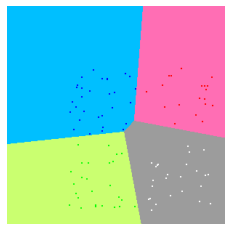


### Implementation of training procedure

With input data `x`, ground_truth `y`, and `model` as parameters, implement the gradient descent method to train your model and plot loss and accuracy vs training iterations

In [178]:
def train(x,
          y,
          model,
          loss_function=cross_entropy_loss, 
          accuracy_function=accuracy,
          max_iteration=500,
          learning_rate=1):
    """
    Args:
       x (2-d list): List of Values with shape: [n_samples, n_channels]
       y (1-d list): List of integers with shape: [n_samples]
       model (Module): Linear model
       loss_function (callable): Loss function to use during training
       accuracy_function (callable): Function used for calculating training accuracy
       max_iteration (int): Number of epochs to train model for
       learning_rate (numeric): Step size of the gradient update
    """
    for i in range(max_iteration):
        #TODO compute y_hat and calculate the loss between y_hat and y as well as
        # the accuracy of y_hat w.r.t y.
        y_hat = model(x)
        loss = loss_function(y_hat,y)
        acc = accuracy_function(y_hat,y)

        #TODO Then You will need to calculate gradient for all parameters, and 
        #do gradient descent for all the parameters.
        #The list of parameters can be easily obtained by calling 
        #model.parameters() which is implemented above.
        
        model.zero_grad()
        loss.backward()
        
        for p in model.parameters():
            p.data -= learning_rate * p.grad
        #Then plot the loss / accuracy vs iterations.
        if i % 20 == 19:
            print("iteration",i,"loss:",loss.data, "accuracy:",acc)
        ## record loss
        if i == 0 :
        # initialize L
            L = loss.data
            A = acc
        else:
            L = np.append(L,loss.data)
            A = np.append(A,acc)
    
    ## Plot Loss and Accuracy
    fig0=plt.figure(0)
    plt.plot(L,'-')
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('Loss', fontsize=16)
    plt.show()
    fig1=plt.figure(1)
    plt.plot(A,'-')
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('Accuracy', fontsize=16)
    plt.show()

In [114]:
datapath = './Q3_data.npz'
data = np.load(datapath)

## Load Data and Parse Shape Information
X = data['X']
Y = data['Y']

### Train the model

Load the data, format it, instantiate your model and start training!

(100, 2) (100,) [0 1 2 3]
iteration 19 loss: 0.5783108324008822 accuracy: 0.95
iteration 39 loss: 0.42307387779444733 accuracy: 0.96
iteration 59 loss: 0.35082955708258146 accuracy: 0.97
iteration 79 loss: 0.3066131083318938 accuracy: 0.98
iteration 99 loss: 0.27589250449857006 accuracy: 0.98
iteration 119 loss: 0.2529051316497662 accuracy: 0.98
iteration 139 loss: 0.23484019369707632 accuracy: 0.99
iteration 159 loss: 0.22013908276625152 accuracy: 0.99
iteration 179 loss: 0.2078580061377473 accuracy: 0.99
iteration 199 loss: 0.19738738922419066 accuracy: 0.99
iteration 219 loss: 0.18831356322022824 accuracy: 0.99
iteration 239 loss: 0.1803445784994755 accuracy: 0.99
iteration 259 loss: 0.17326770821375856 accuracy: 0.99
iteration 279 loss: 0.166923785683369 accuracy: 0.99
iteration 299 loss: 0.16119102049542672 accuracy: 0.99
iteration 319 loss: 0.15597441486820646 accuracy: 1.0
iteration 339 loss: 0.15119862533088577 accuracy: 1.0
iteration 359 loss: 0.1468030183763633 accuracy: 1.0


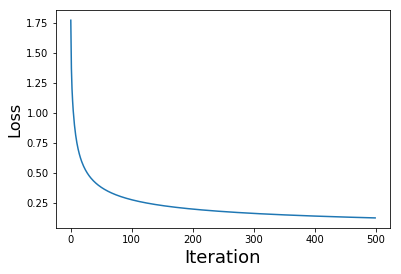

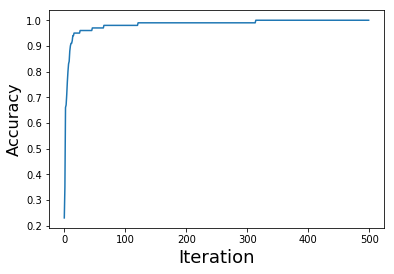

In [179]:
## Load Q3 Dataset
datapath = './Q3_data.npz'
data = np.load(datapath)

## Load Data and Parse Shape Information
X = data['X']
Y = data['Y']
print(X.shape, Y.shape, np.unique(Y))
nin = X.shape[1]
nout = np.max(Y) + 1

## Initialize data using your Value class
x = [[Value(v) for v in sample] for sample in X]
y = [int(v) for v in Y]

## Initialize a Linear Model
linear_model = LinearLayer(nin, nout)

## Train the Model using Your Data
train(x, y, linear_model)

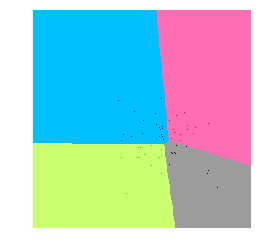

In [188]:
## Visualize learned decision boundaries
visualization(X, Y, linear_model)

## Question 4

### a) Is this dataset linear separable?
load the dataset for this question and train a linear model on this dataset and report the performance

(a) The dataset is not classified very well by linear boundary model.

In [189]:
## Load Q4 Dataset
datapath = './Q4_data.npz'
data = np.load(datapath)

## Parse Data and Identify Dimensions
X = data['X']
Y = data['Y']
nin = X.shape[1]
nout = int(np.max(Y)) + 1

## Initialize data using your value class
x = [[Value(v) for v in sample] for sample in X]
y = [int(v) for v in Y]

iteration 19 loss: 0.37713659212433975 accuracy: 0.8
iteration 39 loss: 0.3581392232629852 accuracy: 0.825
iteration 59 loss: 0.35059987478179333 accuracy: 0.825
iteration 79 loss: 0.3462755056960633 accuracy: 0.825
iteration 99 loss: 0.34343566081708365 accuracy: 0.825
iteration 119 loss: 0.3414359922512911 accuracy: 0.825
iteration 139 loss: 0.33996569353349754 accuracy: 0.825
iteration 159 loss: 0.3388523495864085 accuracy: 0.825
iteration 179 loss: 0.33799121113882113 accuracy: 0.85
iteration 199 loss: 0.33731433872196903 accuracy: 0.85
iteration 219 loss: 0.3367754767745792 accuracy: 0.85
iteration 239 loss: 0.3363419659024297 accuracy: 0.85
iteration 259 loss: 0.33599010008535884 accuracy: 0.85
iteration 279 loss: 0.33570229905477916 accuracy: 0.85
iteration 299 loss: 0.33546530038045774 accuracy: 0.85
iteration 319 loss: 0.3352689572721105 accuracy: 0.85
iteration 339 loss: 0.33510541371774505 accuracy: 0.85
iteration 359 loss: 0.33496852418627227 accuracy: 0.85
iteration 379 lo

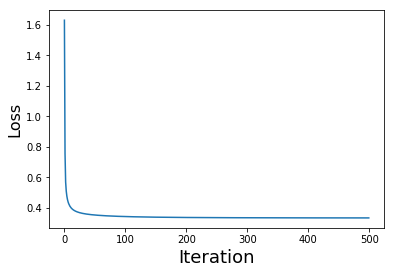

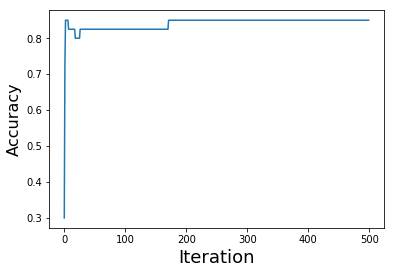

In [190]:
## Initialize Linear Model
linear_model = LinearLayer(nin, nout)

## Train Model
train(x, y, linear_model)

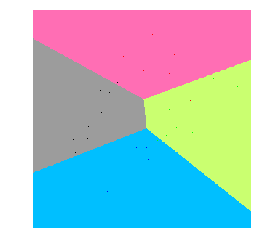

In [191]:
## Visualize Learned Decision Boundary
visualization(X, Y, linear_model)

### b) Implementation of Multi Layer Perceptron (MLP)

Implement a class `MLP` to add arbitrary layers. You will need to implement the forward function to return results `out` with `x` fed into the model.

In [238]:
class MLP(Module):
    
    """
    Multi Layer Perceptron
    """
    def __init__(self, dimensions):
        """
        Initialize multiple layers here in the list named self.linear_layers
        """
        assert isinstance(dimensions, list)
        assert len(dimensions) > 2
        self.linear_layers = []
        for i in range(len(dimensions) - 1):
            self.linear_layers.append(LinearLayer(dimensions[i], dimensions[i+1]))

    def __call__(self, x):
        """
        Args:
            x (2d-list): Two dimensional list of Values with shape [batch_size , nin]
        
        Returns:
            xout (2d-list): Two dimensional list of Values with shape [batch_size, nout]
        """
        #TODO Implement this function and return the output of a MLP
        
        """
        for layer in self.linear_layers:
            x = layer(x)
            print(x)
            
        """
        x1 = self.linear_layers[0](x)
        relu_l = []
        #realize relu activation
        for i in range(len(x1)):
            res= []
            for item in x1[i]:
                res.append(item.relu())
            relu_l.append(res)
        x2 = self.linear_layers[1](relu_l)
        return x2
  
    def parameters(self):
        """
        Get the parameters of each layer
        
        Args:
            None
        
        Returns:
            params (list of Values): Parameters of the MLP
        """
        return [p for layer in self.linear_layers for p in layer.parameters()]
  
    def zero_grad(self):
        """
        Zero out the gradient of each parameter
        """
        for p in self.parameters():
            p.grad = 0

Train your MLP model and visualize the decision boundary with ground truth points.

iteration 19 loss: 0.43885072865879904 accuracy: 0.9
iteration 39 loss: 0.3820700366601859 accuracy: 0.9
iteration 59 loss: 0.3082326871578397 accuracy: 0.925
iteration 79 loss: 0.2936151046489636 accuracy: 0.925
iteration 99 loss: 0.26755532980299196 accuracy: 0.925
iteration 119 loss: 0.23072679288625744 accuracy: 0.925
iteration 139 loss: 0.20773558844580756 accuracy: 0.925
iteration 159 loss: 0.20031634374323595 accuracy: 0.925
iteration 179 loss: 0.19939511708189728 accuracy: 0.925
iteration 199 loss: 0.16929948244182963 accuracy: 0.925
iteration 219 loss: 0.16551048059749504 accuracy: 0.925
iteration 239 loss: 0.16396653970129121 accuracy: 0.925
iteration 259 loss: 0.13808829565387323 accuracy: 0.925
iteration 279 loss: 0.12685913495649978 accuracy: 0.95
iteration 299 loss: 0.11729461381948458 accuracy: 0.95
iteration 319 loss: 0.12054514557284904 accuracy: 0.95
iteration 339 loss: 0.12996247144328651 accuracy: 0.95
iteration 359 loss: 0.1138686512356228 accuracy: 0.95
iteration 

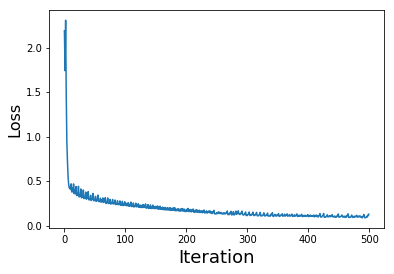

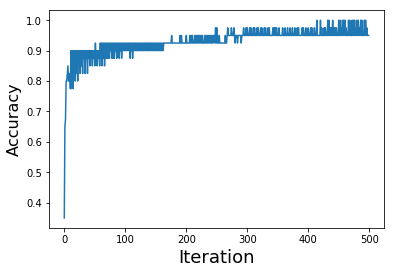

In [239]:
## Initialize MLP with Given Parameters
mlp_model = MLP([nin, 40, nout])

## Train the MLP
train(x, y, mlp_model)

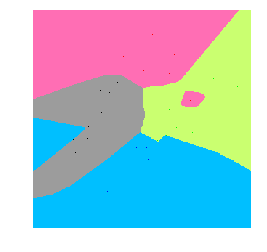

In [240]:
## Visualize Decision Boundaries
visualization(X, Y, mlp_model)

## Acknowledgement

The design of the auto grade structure are based on the work https://github.com/karpathy/micrograd